Learning to use QASM 2.0
this same method can be used with qiskit but first using translation function between qiskit to qasm

In [8]:
import qiskit.qasm2

In [9]:
program = """
    OPENQASM 2.0;
    include "qelib1.inc";
    qreg q[2];
    creg c[2];
 
    h q[0];
    cx q[0], q[1];
 
    measure q -> c;
"""
circuit = qiskit.qasm2.loads(program)
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [10]:
import json
import requests 

from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)  # Disable warnings about insecure requests

In [ ]:
my_quokka = 'theq-adc1cf'
my_quokka = 'quokka1'

#the complete address 
request_http = 'http://{}.quokkacomputing.com/qsim/qasm'.format(my_quokka)

# create dictionary
data = {
    'script': program,
    'count': 100
}

# send the request
result = requests.post(request_http, json=data, verify=False)

# load the object into a Python dictionary
json_obj = json.loads(result.content)

# print the keys and entries
print(json_obj)

{'error': 'no error', 'error_code': 0, 'result': {'c': [[1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0]]}}


Measurement results: ['11', '00', '11', '00', '11', '11', '00', '00', '00', '00', '00', '00', '00', '11', '11', '00', '00', '00', '00', '11', '00', '00', '11', '00', '11', '11', '11', '00', '00', '11', '11', '00', '11', '11', '00', '00', '00', '11', '11', '00', '11', '11', '00', '00', '00', '11', '11', '11', '00', '00', '11', '00', '11', '11', '11', '00', '00', '00', '00', '11', '00', '00', '00', '00', '00', '11', '00', '11', '11', '00', '00', '00', '00', '00', '11', '11', '11', '00', '00', '11', '00', '11', '11', '11', '00', '11', '11', '00', '00', '00', '11', '11', '11', '11', '11', '00', '11', '11', '11', '00']


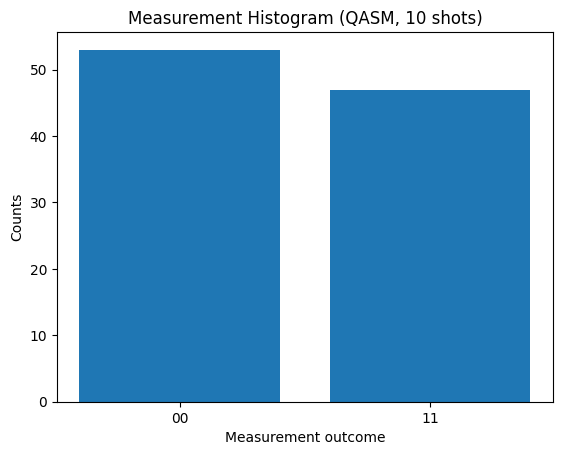

In [12]:
import matplotlib.pyplot as plt

# Extract measurement results
pairs = json_obj["result"]["c"]     # e.g. [[0,1], [1,1], ...]

# Convert to bitstrings
bitstrings = [''.join(map(str, p)) for p in pairs]

print("Measurement results:", bitstrings)

# Dynamic labels (no hard-coding)
x = sorted(set(bitstrings))
y = [bitstrings.count(v) for v in x]

# Plot bar chart
plt.bar(x, y)
plt.xticks(x)
plt.xlabel("Measurement outcome")
plt.ylabel("Counts")
plt.title("Measurement Histogram (QASM, 10 shots)")
plt.show()